In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=test.csv

In [2]:
train_path = 'train.csv'
test_path = 'test.csv'

In [4]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

print('Training Set: ', train_data.shape)
print('Testing Set: ', test_data.shape)

Training Set:  (1460, 81)
Testing Set:  (1459, 80)


In [5]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

# Missing data process

## Training set

In [9]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [10]:
null_train_data = train_data.isnull().mean().sort_values()
null_train_data = null_train_data[null_train_data > 0.]

In [11]:
# 缺失比例
missing_rate = (train_data.isnull().sum()/1460).sort_values()
missing_rate

Id               0.000000
TotalBsmtSF      0.000000
Heating          0.000000
SaleCondition    0.000000
CentralAir       0.000000
                   ...   
FireplaceQu      0.472603
Fence            0.807534
Alley            0.937671
MiscFeature      0.963014
PoolQC           0.995205
Length: 81, dtype: float64

In [12]:
null_train_data.index.values

array(['Electrical', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'GarageQual',
       'GarageFinish', 'GarageYrBlt', 'GarageType', 'GarageCond',
       'LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature',
       'PoolQC'], dtype=object)

<BarContainer object of 19 artists>

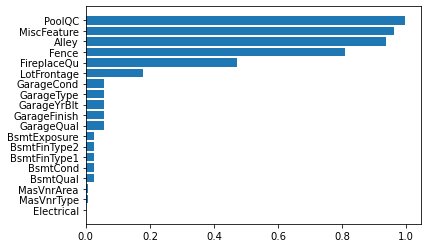

In [13]:
plt.barh(null_train_data.index.values, null_train_data)

In [14]:
null_cols = list(null_train_data[null_train_data > 0.1].index)
null_cols

['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']

In [15]:
len(train_data.columns)

81

In [16]:
# 刪除缺失比率太高的欄位
train_data = train_data.drop(columns=null_cols)
len(train_data.columns)

75

## Test set

<BarContainer object of 33 artists>

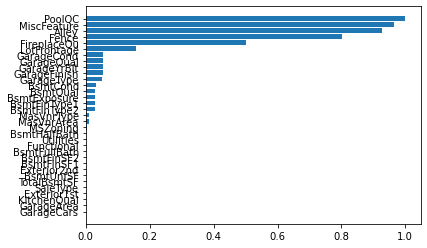

In [17]:
null_test_data = test_data.isnull().mean().sort_values()
null_test_data = null_test_data[null_test_data > 0.]
plt.barh(null_test_data.index.values, null_test_data)

In [18]:
# 刪除缺失比率太高的欄位
test_null_cols = list(null_test_data[null_test_data > 0.1].index)
print(test_null_cols)

test_data = test_data.drop(columns=test_null_cols)

['LotFrontage', 'FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC']


## 剩餘缺失值

In [19]:
# 訓練集剩餘的所有缺失值欄位
null_train_data = train_data.isnull().any()
null_train_data_index = null_train_data[null_train_data].index
null_train_data_index

Index(['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [20]:
# 測試集剩餘的所有缺失值欄位
null_test_data = test_data.isnull().any()
null_test_data_index = null_test_data[null_test_data].index
null_test_data_index

Index(['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'SaleType'],
      dtype='object')

In [21]:
# 所有缺失值欄位
un_value = set(null_train_data_index).union(set(null_test_data_index))

In [22]:
train_data[un_value].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 28 entries, BsmtCond to BsmtExposure
dtypes: float64(2), int64(8), object(18)
memory usage: 319.5+ KB


In [23]:
# 字串型數據
cat_cols = train_data[un_value].select_dtypes(include='O').columns.values
train_data[un_value].select_dtypes(include='O')

,BsmtCond,Utilities,MasVnrType,MSZoning,GarageType,Electrical,BsmtQual,GarageCond,KitchenQual,BsmtFinType2,SaleType,BsmtFinType1,Exterior1st,Functional,GarageQual,GarageFinish,Exterior2nd,BsmtExposure
0,TA,AllPub,BrkFace,RL,Attchd,SBrkr,Gd,TA,Gd,Unf,WD,GLQ,VinylSd,Typ,TA,RFn,VinylSd,No
1,TA,AllPub,None,RL,Attchd,SBrkr,Gd,TA,TA,Unf,WD,ALQ,MetalSd,Typ,TA,RFn,MetalSd,Gd
2,TA,AllPub,BrkFace,RL,Attchd,SBrkr,Gd,TA,Gd,Unf,WD,GLQ,VinylSd,Typ,TA,RFn,VinylSd,Mn
3,Gd,AllPub,None,RL,Detchd,SBrkr,TA,TA,Gd,Unf,WD,ALQ,Wd Sdng,Typ,TA,Unf,Wd Shng,No
4,TA,AllPub,BrkFace,RL,Attchd,SBrkr,Gd,TA,Gd,Unf,WD,GLQ,VinylSd,Typ,TA,RFn,VinylSd,Av
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,TA,AllPub,None,RL,Attchd,SBrkr,Gd,TA,TA,Unf,WD,Unf,VinylSd,Typ,TA,RFn,VinylSd,No
1456,TA,AllPub,Stone,RL,Attchd,SBrkr,Gd,TA,TA,Rec,WD,ALQ,Plywood,Min1,TA,Unf,Plywood,No
1457,Gd,AllPub,None,RL,Attchd,SBrkr,TA,TA,Gd,Unf,WD,GLQ,CemntBd,Typ,TA,RFn,CmentBd,No
1458,TA,AllPub,None,RL,Attchd,FuseA,TA,TA,Gd,Rec,WD,GLQ,MetalSd,Typ,TA,Unf,MetalSd,Mn


In [24]:
# 數值型數據
num_cols = train_data[un_value].select_dtypes(include=np.number).columns.values
train_data[un_value].select_dtypes(include=np.number)

,BsmtUnfSF,BsmtFinSF1,GarageArea,BsmtHalfBath,BsmtFinSF2,TotalBsmtSF,GarageYrBlt,MasVnrArea,BsmtFullBath,GarageCars
0,150,706,548,0,0,856,2003.0,196.0,1,2
1,284,978,460,1,0,1262,1976.0,0.0,0,2
2,434,486,608,0,0,920,2001.0,162.0,1,2
3,540,216,642,0,0,756,1998.0,0.0,1,3
4,490,655,836,0,0,1145,2000.0,350.0,1,3
...,...,...,...,...,...,...,...,...,...,...
1455,953,0,460,0,0,953,1999.0,0.0,0,2
1456,589,790,500,0,163,1542,1978.0,119.0,1,2
1457,877,275,252,0,0,1152,1941.0,0.0,0,1
1458,0,49,240,0,1029,1078,1950.0,0.0,1,1


In [25]:
print("cat_cols:", cat_cols)
print("--------------------")
print("num_cols:", num_cols)

cat_cols: ['BsmtCond' 'Utilities' 'MasVnrType' 'MSZoning' 'GarageType' 'Electrical'
 'BsmtQual' 'GarageCond' 'KitchenQual' 'BsmtFinType2' 'SaleType'
 'BsmtFinType1' 'Exterior1st' 'Functional' 'GarageQual' 'GarageFinish'
 'Exterior2nd' 'BsmtExposure']
--------------------
num_cols: ['BsmtUnfSF' 'BsmtFinSF1' 'GarageArea' 'BsmtHalfBath' 'BsmtFinSF2'
 'TotalBsmtSF' 'GarageYrBlt' 'MasVnrArea' 'BsmtFullBath' 'GarageCars']


### 針對類別欄位

In [26]:
train_data[cat_cols].describe()

,BsmtCond,Utilities,MasVnrType,MSZoning,GarageType,Electrical,BsmtQual,GarageCond,KitchenQual,BsmtFinType2,SaleType,BsmtFinType1,Exterior1st,Functional,GarageQual,GarageFinish,Exterior2nd,BsmtExposure
count,1423,1460,1452,1460,1379,1459,1423,1379,1460,1422,1460,1423,1460,1460,1379,1379,1460,1422
unique,4,2,4,5,6,5,4,5,4,6,9,6,15,7,5,3,16,4
top,TA,AllPub,None,RL,Attchd,SBrkr,TA,TA,TA,Unf,WD,Unf,VinylSd,Typ,TA,Unf,VinylSd,No
freq,1311,1459,864,1151,870,1334,649,1326,735,1256,1267,430,515,1360,1311,605,504,953


In [27]:
train_data_freq = train_data[cat_cols].describe().loc[["top", "freq"]].transpose()
train_data_freq

,top,freq
BsmtCond,TA,1311
Utilities,AllPub,1459
MasVnrType,None,864
MSZoning,RL,1151
GarageType,Attchd,870
Electrical,SBrkr,1334
BsmtQual,TA,649
GarageCond,TA,1326
KitchenQual,TA,735
BsmtFinType2,Unf,1256


In [28]:
# 訓練集類別頻率大於 1000
train_cat_dict = train_data_freq[train_data_freq['freq'] > 1000]['top'].to_dict()

In [29]:
test_data[cat_cols].describe()

,BsmtCond,Utilities,MasVnrType,MSZoning,GarageType,Electrical,BsmtQual,GarageCond,KitchenQual,BsmtFinType2,SaleType,BsmtFinType1,Exterior1st,Functional,GarageQual,GarageFinish,Exterior2nd,BsmtExposure
count,1414,1457,1443,1455,1383,1459,1415,1381,1458,1417,1458,1417,1458,1457,1381,1381,1458,1415
unique,4,1,4,5,6,4,4,5,4,6,9,6,13,7,4,3,15,4
top,TA,AllPub,None,RL,Attchd,SBrkr,TA,TA,TA,Unf,WD,GLQ,VinylSd,Typ,TA,Unf,VinylSd,No
freq,1295,1457,878,1114,853,1337,634,1328,757,1237,1258,431,510,1357,1293,625,510,951


In [30]:
# 測試集類別頻率大於 1000
test_data_freq = test_data[cat_cols].describe().loc[["top", "freq"]].transpose()
test_cat_dict = test_data_freq[test_data_freq['freq'] > 1000]['top'].to_dict()

In [31]:
# 訓練集類別頻率小於等於 1000
train_cat_null_dict = {}
for i in train_data_freq[train_data_freq['freq'] <= 1000].index:
    train_cat_null_dict[i] = 'NA'

train_cat_null_dict

{'MasVnrType': 'NA',
 'GarageType': 'NA',
 'BsmtQual': 'NA',
 'KitchenQual': 'NA',
 'BsmtFinType1': 'NA',
 'Exterior1st': 'NA',
 'GarageFinish': 'NA',
 'Exterior2nd': 'NA',
 'BsmtExposure': 'NA'}

In [32]:
# 測試集類別頻率小於等於 1000
test_cat_null_dict = {}
for i in test_data_freq[test_data_freq['freq'] <= 1000].index:
    test_cat_null_dict[i] = 'NA'

test_cat_null_dict

{'MasVnrType': 'NA',
 'GarageType': 'NA',
 'BsmtQual': 'NA',
 'KitchenQual': 'NA',
 'BsmtFinType1': 'NA',
 'Exterior1st': 'NA',
 'GarageFinish': 'NA',
 'Exterior2nd': 'NA',
 'BsmtExposure': 'NA'}

In [33]:
# 合併訓練集頻率補值
train_cat_dict.update(train_cat_null_dict)
train_cat_dict

{'BsmtCond': 'TA',
 'Utilities': 'AllPub',
 'MSZoning': 'RL',
 'Electrical': 'SBrkr',
 'GarageCond': 'TA',
 'BsmtFinType2': 'Unf',
 'SaleType': 'WD',
 'Functional': 'Typ',
 'GarageQual': 'TA',
 'MasVnrType': 'NA',
 'GarageType': 'NA',
 'BsmtQual': 'NA',
 'KitchenQual': 'NA',
 'BsmtFinType1': 'NA',
 'Exterior1st': 'NA',
 'GarageFinish': 'NA',
 'Exterior2nd': 'NA',
 'BsmtExposure': 'NA'}

In [34]:
# 合併測試集頻率補值
test_cat_dict.update(test_cat_null_dict)
test_cat_dict

{'BsmtCond': 'TA',
 'Utilities': 'AllPub',
 'MSZoning': 'RL',
 'Electrical': 'SBrkr',
 'GarageCond': 'TA',
 'BsmtFinType2': 'Unf',
 'SaleType': 'WD',
 'Functional': 'Typ',
 'GarageQual': 'TA',
 'MasVnrType': 'NA',
 'GarageType': 'NA',
 'BsmtQual': 'NA',
 'KitchenQual': 'NA',
 'BsmtFinType1': 'NA',
 'Exterior1st': 'NA',
 'GarageFinish': 'NA',
 'Exterior2nd': 'NA',
 'BsmtExposure': 'NA'}

In [35]:
# 缺失值填補
train_data.fillna(value=train_cat_dict, inplace=True)
test_data.fillna(value=test_cat_dict, inplace=True)

In [36]:
# 檢查類別欄位缺失值剩餘數量
print("Missing data in training set: ", sum(train_data[cat_cols].isnull().any()))
print("Missing data in testing set: ", sum(test_data[cat_cols].isnull().any()))

Missing data in training set:  0
Missing data in testing set:  0


### 針對數值欄位

In [37]:
train_data[num_cols].describe()

,BsmtUnfSF,BsmtFinSF1,GarageArea,BsmtHalfBath,BsmtFinSF2,TotalBsmtSF,GarageYrBlt,MasVnrArea,BsmtFullBath,GarageCars
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1452.000000,1460.000000,1460.000000
mean,567.240411,443.639726,472.980137,0.057534,46.549315,1057.429452,1978.506164,103.685262,0.425342,1.767123
std,441.866955,456.098091,213.804841,0.238753,161.319273,438.705324,24.689725,181.066207,0.518911,0.747315
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000
25%,223.000000,0.000000,334.500000,0.000000,0.000000,795.750000,1961.000000,0.000000,0.000000,1.000000
50%,477.500000,383.500000,480.000000,0.000000,0.000000,991.500000,1980.000000,0.000000,0.000000,2.000000
75%,808.000000,712.250000,576.000000,0.000000,0.000000,1298.250000,2002.000000,166.000000,1.000000,2.000000
max,2336.000000,5644.000000,1418.000000,2.000000,1474.000000,6110.000000,2010.000000,1600.000000,3.000000,4.000000


In [38]:
for i in num_cols:
    if sum(train_data[i].isnull()) != 0:
        print(i)

GarageYrBlt
MasVnrArea


In [39]:
print("GarageYrBlt original missing data:", sum(train_data["GarageYrBlt"].isnull()))
GarageYrBlt_median = train_data["GarageYrBlt"].describe()["50%"]
train_data["GarageYrBlt"].fillna(value= GarageYrBlt_median, inplace=True)
print("GarageYrBlt missing data:", sum(train_data["GarageYrBlt"].isnull()))

GarageYrBlt original missing data: 81
GarageYrBlt missing data: 0


In [40]:
print("MasVnrArea original missing data:", sum(train_data["MasVnrArea"].isnull()))
train_data["MasVnrArea"].fillna(value=0, inplace=True)
print("MasVnrArea missing data:", sum(train_data["MasVnrArea"].isnull()))

MasVnrArea original missing data: 8
MasVnrArea missing data: 0


In [41]:
num_cols

array(['BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'BsmtHalfBath',
       'BsmtFinSF2', 'TotalBsmtSF', 'GarageYrBlt', 'MasVnrArea',
       'BsmtFullBath', 'GarageCars'], dtype=object)

In [42]:
test_data[num_cols].describe()

,BsmtUnfSF,BsmtFinSF1,GarageArea,BsmtHalfBath,BsmtFinSF2,TotalBsmtSF,GarageYrBlt,MasVnrArea,BsmtFullBath,GarageCars
count,1458.000000,1458.000000,1458.000000,1457.000000,1458.000000,1458.000000,1381.000000,1444.000000,1457.000000,1458.000000
mean,554.294925,439.203704,472.768861,0.065202,52.619342,1046.117970,1977.721217,100.709141,0.434454,1.766118
std,437.260486,455.268042,217.048611,0.252468,176.753926,442.898624,26.431175,177.625900,0.530648,0.775945
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1895.000000,0.000000,0.000000,0.000000
25%,219.250000,0.000000,318.000000,0.000000,0.000000,784.000000,1959.000000,0.000000,0.000000,1.000000
50%,460.000000,350.500000,480.000000,0.000000,0.000000,988.000000,1979.000000,0.000000,0.000000,2.000000
75%,797.750000,753.500000,576.000000,0.000000,0.000000,1305.000000,2002.000000,164.000000,1.000000,2.000000
max,2140.000000,4010.000000,1488.000000,2.000000,1526.000000,5095.000000,2207.000000,1290.000000,3.000000,5.000000


In [43]:
for i in num_cols:
    if sum(test_data[i].isnull()) != 0:
        print(i)

BsmtUnfSF
BsmtFinSF1
GarageArea
BsmtHalfBath
BsmtFinSF2
TotalBsmtSF
GarageYrBlt
MasVnrArea
BsmtFullBath
GarageCars


In [44]:
print("GarageYrBlt original missing data:", sum(test_data["GarageYrBlt"].isnull()))
GarageYrBlt_median = test_data["GarageYrBlt"].describe()["50%"]
test_data["GarageYrBlt"].fillna(value= GarageYrBlt_median, inplace=True)
print("GarageYrBlt missing data:", sum(test_data["GarageYrBlt"].isnull()))

GarageYrBlt original missing data: 78
GarageYrBlt missing data: 0


In [45]:
test_data[num_cols] = test_data[num_cols].fillna(value=0)

In [46]:
# 檢查類別欄位缺失值剩餘數量
print("Missing data in training set: ", sum(train_data[num_cols].isnull().any()))
print("Missing data in testing set: ", sum(test_data[num_cols].isnull().any()))

Missing data in training set:  0
Missing data in testing set:  0


# Outlier process

In [47]:
pd.set_option('display.max_columns', None)
train_data.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


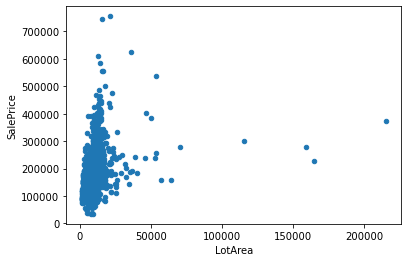

In [48]:
# LotArea 土地面積 與 SalePrice 房價的相關性 
train_data.plot(kind="scatter",x="LotArea",y="SalePrice")

0.7086244776126522


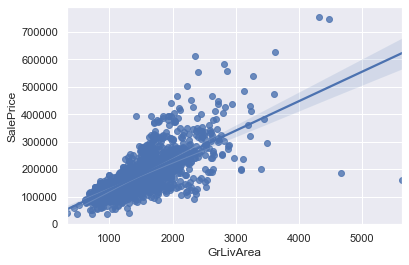

In [49]:
# GrLivArea 地面層生活面積 與 SalePrice 房價的相關性
sns.set()
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train_data)
print(np.corrcoef(train_data["GrLivArea"], train_data["SalePrice"])[0, 1])

### 去除極端值

0.7205163006738732


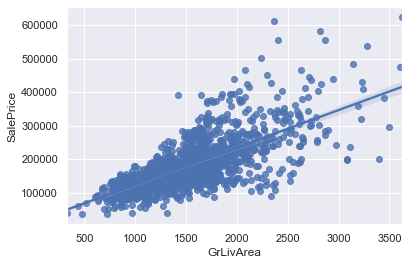

In [50]:
# 去除 GrLivArea 值大於 4000 的值
train_data_no_outlier = train_data[train_data["GrLivArea"] < 4000].copy()
ax = sns.regplot(x="GrLivArea", y="SalePrice", data=train_data_no_outlier)
print(np.corrcoef(train_data_no_outlier["GrLivArea"], train_data_no_outlier["SalePrice"])[0, 1])

In [51]:
train_data.shape

(1460, 75)

In [52]:
train_data_no_outlier.shape

(1456, 75)

In [53]:
test_data.shape

(1459, 74)

# Feature transform 

The skewness: 1.5659592925562151


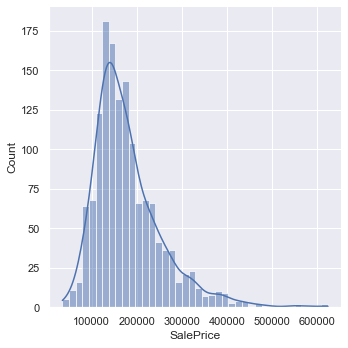

In [65]:
# skewness 大於 0 為右偏態 (正偏態)；小於 0 為左偏態 (負偏態)
print('The skewness:', train_data_no_outlier["SalePrice"].skew())

train_sale_price = train_data_no_outlier["SalePrice"]
sns.displot(train_sale_price, kde=True)

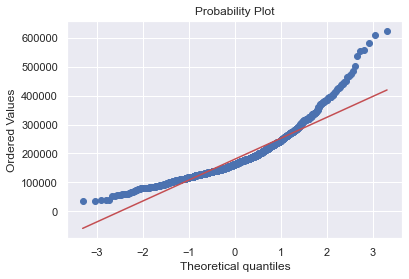

In [66]:
# QQ plot
stats.probplot(train_sale_price, plot=plt)
plt.show()

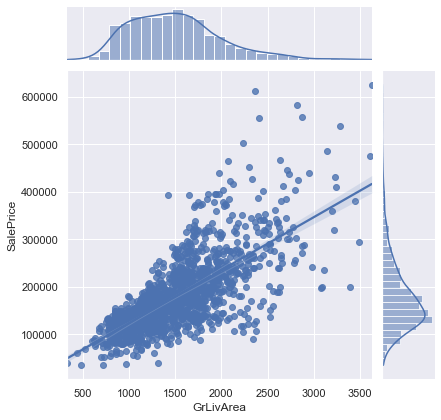

In [67]:
sns.jointplot(x=train_data_no_outlier["GrLivArea"], 
              y=train_data_no_outlier["SalePrice"], 
              data=train_data_no_outlier, kind='reg')

### log transform

The skewness:  0.06546006911025826


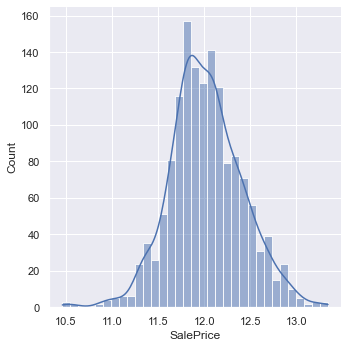

In [68]:
log_train_sale_price = np.log1p(train_sale_price)
print("The skewness: ", log_train_sale_price.skew())

sns.displot(log_train_sale_price, kde=True)

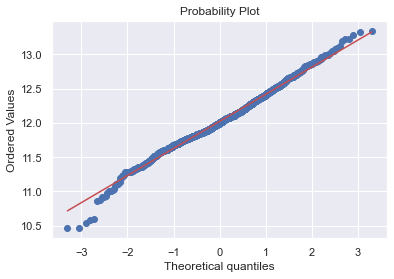

In [69]:
stats.probplot(log_train_sale_price, plot=plt)
plt.show()

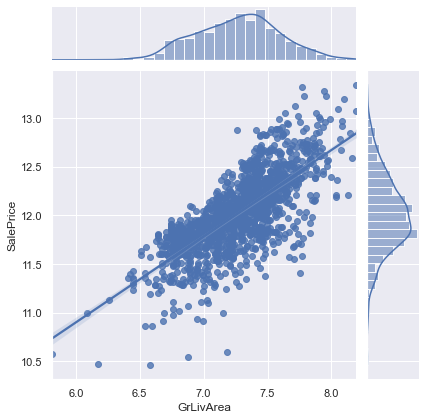

In [70]:
log_train_GrLivArea = np.log1p(train_data_no_outlier['GrLivArea'])

log_train_data_no_outlier = train_data_no_outlier.copy()
log_train_data_no_outlier['SalePrice'] = log_train_sale_price
log_train_data_no_outlier['GrLivArea'] = log_train_GrLivArea

sns.jointplot(x=log_train_GrLivArea, y=log_train_sale_price, 
              data=log_train_data_no_outlier, kind='reg')

### 針對部分數值特徵轉換 -- 類別變數

In [71]:
train_data_no_outlier1 = train_data

In [72]:
# 轉換為類別
# 找出與 target 的相關係數 < 0.1
train_data_corr = train_data_no_outlier.select_dtypes(include=np.number).corr()["SalePrice"]

values = train_data_corr[abs(train_data_corr) < 0.1].index.values

values

array(['Id', 'MSSubClass', 'OverallCond', 'BsmtFinSF2', 'LowQualFinSF',
       'BsmtHalfBath', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'YrSold'], dtype=object)

In [73]:
# 找出 unique value < 20 的特徵 
# (unique 值過少、與 target 的相關係數低，則將特徵轉換為類別變數)
for val in values:
    if len(train_data_no_outlier[val].unique()) < 20:
        print(val)

MSSubClass
OverallCond
BsmtHalfBath
PoolArea
MoSold
YrSold


MSSubClass(建築類型), OverallCond(建材品質), MoSold(賣出月份), YrSold(賣出年份) 需要轉為類別變數，其中 OverallCond, MoSold, YrSold 是有順序性的

https://www.kaggle.com/eiosifov/non-logarithm-house-pricing-randomforestregressor#Dealing-with-categorical-values

In [74]:
# 觀察 BsmtHalfBath
a = train_data_no_outlier[["BsmtHalfBath", "SalePrice"]].groupby(["BsmtHalfBath"])

# 分為三個組
a.groups

{0: [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, ...], 1: [1, 26, 33, 37, 41, 50, 93, 116, 129, 176, 197, 201, 213, 215, 218, 245, 249, 251, 253, 298, 299, 314, 330, 352, 358, 367, 414, 421, 426, 499, 504, 558, 574, 576, 580, 611, 628, 633, 658, 697, 717, 741, 743, 745, 814, 828, 892, 920, 925, 931, 944, 952, 953, 1006, 1029, 1041, 1047, 1052, 1055, 1069, 1072, 1076, 1080, 1103, 1118, 1123, 1149, 1156, 1181, 1213, 1225, 1276, 1287, 1327, 1335, 1350, 1389, 1405, 1415], 2: [597, 954]}

In [75]:
# BsmtHalfBath 與 SalePrice 數值沒關聯
val = 'BsmtHalfBath'
train_data_no_outlier[[val, 'SalePrice']].groupby([val]).agg({
    'SalePrice':'median',
    val:'count'
}).sort_values(by='SalePrice', ascending=False)

,SalePrice,BsmtHalfBath
BsmtHalfBath,,
0,163000.0,1375
2,160850.5,2
1,158500.0,79


In [76]:
# PoolArea 值幾乎集中在 0，可以刪掉此特徵
val = 'PoolArea'
train_data_no_outlier[[val, 'SalePrice']].groupby([val]).agg({
    'SalePrice':'median',
    val:'count'
}).sort_values(by='SalePrice', ascending=False)

,SalePrice,PoolArea
PoolArea,,
738,274970,1
519,250000,1
512,235000,1
648,181000,1
576,171000,1
0,162900,1451


In [77]:
train_data_no_outlier = train_data_no_outlier.drop(columns="PoolArea")

In [78]:
# 轉為 string
train_data_no_outlier["MSSubClass"] = train_data_no_outlier["MSSubClass"].astype('str')
train_data_no_outlier["BsmtHalfBath"] = train_data_no_outlier["BsmtHalfBath"].astype('str')

In [79]:
# 測試集
test_data["MSSubClass"] = test_data["MSSubClass"].astype('str')
test_data["BsmtHalfBath"] = test_data["BsmtHalfBath"].astype('str')

### 針對部分數值特徵轉換 -- 有順序性

BsmtQual (地下層高度), BsmtCond (地下層狀況), GarageQual (車庫品質), GarageCond (車庫條件), ExterQual (外部材質品質), ExterCond (外部材質狀況), HeatingQC (暖氣品質), KitchenQual (廚房品質)：以 Ex, Gd, TA, Fa, Po 來表示高低之分, NA 為缺失值

In [80]:
train_data_no_outlier['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    117
NA     37
Fa     35
Name: BsmtQual, dtype: int64

In [81]:
test_data['BsmtQual'].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
NA     44
Name: BsmtQual, dtype: int64

In [82]:
ordi_cols_1 = ['BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond',
               'ExterQual', 'ExterCond', 'HeatingQC', 'KitchenQual']

for val in ordi_cols_1:
    train_data_no_outlier[val].replace(to_replace=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                   value=[0, 1, 2, 3, 4, 5],
                   inplace=True)
    test_data[val].replace(to_replace=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'],
                   value=[0, 1, 2, 3, 4, 5],
                   inplace=True)

BsmtFinType1 (地下層居住品質), BsmtFinType2 (地下層第二處生活品質)：以 GLQ, ALQ, BLQ, Rec, LwQ, Unf 來表示高低之分, NA 為缺失值

In [83]:
ordi_cols_2 = ['BsmtFinType1', 'BsmtFinType2']
for val in ordi_cols_2:
    train_data_no_outlier[val].replace(to_replace=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                   value=[0, 1, 2, 3, 4, 5, 6],
                   inplace=True)
    test_data[val].replace(to_replace=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ', 'ALQ', 'GLQ'],
                   value=[0, 1, 2, 3, 4, 5, 6],
                   inplace=True)

BsmtExposure (地下層對外通風品質)：以 Gd, Av, Mn, No 來表示高低之分, NA 為缺失值

In [84]:
train_data_no_outlier['BsmtExposure'].replace(to_replace=['NA', 'No', 'Mn', 'Av', 'Gd'],
                          value=[0, 1, 2, 3, 4],
                          inplace=True)
test_data['BsmtExposure'].replace(to_replace=['NA', 'No', 'Mn', 'Av', 'Gd'],
                          value=[0, 1, 2, 3, 4],
                          inplace=True)

CentralAir (是否有中央空調), Y 為有，N 為無，NA 為缺失值

In [85]:
train_data_no_outlier['CentralAir'].replace(to_replace=['NA', 'N', 'Y'],
                        value=[0, 1, 2],
                        inplace=True)
test_data['CentralAir'].replace(to_replace=['NA', 'N', 'Y'],
                        value=[0, 1, 2],
                        inplace=True)

Functional (房屋功能性評分)：以 Typ, Min1, Min2, Mod, Maj1, Maj2, Sev, Sal 來表示高低之分, NA 為缺失值

In [86]:
train_data_no_outlier['Functional'].replace(to_replace=['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                        value=[0, 1, 2, 3, 4, 5, 6, 7, 8],
                        inplace=True)
test_data['Functional'].replace(to_replace=['NA', 'Sal', 'Sev', 'Maj2', 'Maj1', 'Mod', 'Min2', 'Min1', 'Typ'],
                        value=[0, 1, 2, 3, 4, 5, 6, 7, 8],
                        inplace=True)

GarageFinish (車庫內裝潢完整度)：以 Fin, RFn, Unf 來表示高低之分, NA 為缺失值

In [87]:
train_data_no_outlier['GarageFinish'].replace(to_replace=['NA', 'Unf', 'RFn', 'Fin'],
                          value=[0, 1, 2, 3],
                          inplace=True)
test_data['GarageFinish'].replace(to_replace=['NA', 'Unf', 'RFn', 'Fin'],
                          value=[0, 1, 2, 3],
                          inplace=True)

LandSlope (土地斜度)：以 Gtl, Mod, Sev 來表示高低之分, NA 為缺失值

In [88]:
train_data_no_outlier['LandSlope'].replace(to_replace=['NA', 'Sev', 'Mod', 'Gtl'],
                       value=[0, 1, 2, 3],
                       inplace=True)
test_data['LandSlope'].replace(to_replace=['NA', 'Sev', 'Mod', 'Gtl'],
                       value=[0, 1, 2, 3],
                       inplace=True)

LotShape (物業形狀)：以 Reg, IR1, IR2, IR3 來表示高低之分, NA 為缺失值

In [89]:
train_data_no_outlier['LotShape'].replace(to_replace=['NA', 'IR3', 'IR2', 'IR1', 'Reg'],
                      value=[0, 1, 2, 3, 4],
                      inplace=True)
test_data['LotShape'].replace(to_replace=['NA', 'IR3', 'IR2', 'IR1', 'Reg'],
                      value=[0, 1, 2, 3, 4],
                      inplace=True)

PacedDrive (車道鋪設材質)：以 Y, P, N 來表示高低之分, NA 為缺失值

In [90]:
train_data_no_outlier['PavedDrive'].replace(to_replace=['NA', 'N', 'P', 'Y'],
                        value=[0, 1, 2, 3],
                        inplace=True)
test_data['PavedDrive'].replace(to_replace=['NA', 'N', 'P', 'Y'],
                        value=[0, 1, 2, 3],
                        inplace=True)

Street (街道鋪設類型)：Pave 為石塊路面, Grvl 為碎石路面, NA 為缺失值

In [91]:
train_data_no_outlier['Street'].replace(to_replace=['NA', 'Grvl', 'Pave'],
                    value=[0, 1, 2],
                    inplace=True)
test_data['Street'].replace(to_replace=['NA', 'Grvl', 'Pave'],
                    value=[0, 1, 2],
                    inplace=True)

# 變數篩選

In [92]:
X = train_data_no_outlier.copy()
X.pop('SalePrice')
X = pd.get_dummies(X)
X

,Id,LotArea,Street,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_NA,MasVnrType_None,MasVnrType_Stone,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtHalfBath_0,BsmtHalfBath_1,BsmtHalfBath_2,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,8450,2,4,3,7,5,2003,2003,196.0,4,3,4,3,1,6,706,1,0,150,856,5,2,856,854,0,1710,1,2,1,3,1,4,8,8,0,2003.0,2,2,548,3,3,3,0,61,0,0,0,0,2,2008,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,

In [93]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    random_state=20,
    n_estimators=500,
    min_samples_leaf=0.01)

rf.fit(X, log_train_sale_price)

RandomForestRegressor(min_samples_leaf=0.01, n_estimators=500, random_state=20)

In [94]:
rf.feature_importances_.shape

(228,)

In [95]:
ft_ip = pd.Series(data=rf.feature_importances_,
                index=X.columns,
                name='feature_importance')

ft_ip

Id                       0.000481
LotArea                  0.007823
Street                   0.000000
LotShape                 0.000754
LandSlope                0.000000
                           ...   
SaleCondition_AdjLand    0.000000
SaleCondition_Alloca     0.000000
SaleCondition_Family     0.000000
SaleCondition_Normal     0.000101
SaleCondition_Partial    0.000032
Name: feature_importance, Length: 228, dtype: float64

In [96]:
ft_ip = ft_ip.sort_values(ascending=False)
cum_sum = ft_ip.cumsum()
cum_sum.name = 'ft_ip_cumsum'
ft_ip = pd.concat([ft_ip, cum_sum], axis=1)

ft_ip

,feature_importance,ft_ip_cumsum
OverallQual,0.624749,0.624749
GrLivArea,0.123734,0.748484
TotalBsmtSF,0.049027,0.797510
GarageCars,0.034093,0.831603
GarageArea,0.027891,0.859494
...,...,...
Condition2_RRNn,0.000000,1.000000
BldgType_2fmCon,0.000000,1.000000
BldgType_Twnhs,0.000000,1.000000
MSSubClass_120,0.000000,1.000000


In [97]:
# 篩選變數解釋佔比 < 0.9999
cols_idx = ft_ip[ft_ip['ft_ip_cumsum'] < 0.9999].index

In [98]:
ft_ip.loc[cols_idx,:]

,feature_importance,ft_ip_cumsum
OverallQual,0.624749,0.624749
GrLivArea,0.123734,0.748484
TotalBsmtSF,0.049027,0.797510
GarageCars,0.034093,0.831603
GarageArea,0.027891,0.859494
...,...,...
Neighborhood_NridgHt,0.000019,0.999821
MSSubClass_160,0.000019,0.999840
MasVnrType_Stone,0.000018,0.999858
Foundation_BrkTil,0.000018,0.999876


In [99]:
# 搜集變數名稱
print('Length of cols(inflated by dummy variables): {}'.format(len(cols_idx)))
cols = [i.split('_')[0] for i in cols_idx.values]
cols = list(set(cols))
print('Lenght of unique cols: {}'.format(len(cols)))

Length of cols(inflated by dummy variables): 75
Lenght of unique cols: 53


In [100]:
cols

['GrLivArea',
 'FullBath',
 'BsmtUnfSF',
 'KitchenAbvGr',
 'MasVnrType',
 'MSZoning',
 'WoodDeckSF',
 'BedroomAbvGr',
 'SaleCondition',
 'RoofStyle',
 'GarageType',
 'OverallCond',
 'Electrical',
 'BsmtQual',
 'OpenPorchSF',
 'EnclosedPorch',
 'KitchenQual',
 'BsmtFinSF1',
 'Id',
 'GarageArea',
 'SaleType',
 'TotRmsAbvGrd',
 'HeatingQC',
 'BsmtFinType1',
 'Exterior1st',
 'HalfBath',
 'YrSold',
 '1stFlrSF',
 'OverallQual',
 'GarageFinish',
 'MSSubClass',
 'CentralAir',
 'TotalBsmtSF',
 'GarageYrBlt',
 'ExterQual',
 'MasVnrArea',
 'BsmtFullBath',
 'Exterior2nd',
 'YearRemodAdd',
 'MoSold',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'GarageCars',
 'PavedDrive',
 'LotArea',
 'BldgType',
 '2ndFlrSF',
 'Foundation',
 'LotShape',
 'BsmtExposure',
 'YearBuilt',
 'Fireplaces']

In [101]:
len(train_data_no_outlier.columns)

74

### 觀察篩選後變數間的相關性

In [102]:
select_cols = cols + ['SalePrice']

In [103]:
# 查看有多少個數值型欄位
train_data_no_outlier[select_cols].info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Columns: 54 entries, GrLivArea to SalePrice
dtypes: float64(2), int64(37), object(15)
memory usage: 625.6+ KB


In [104]:
# 取前 10 大的值算相關係數
corrmat = train_data_no_outlier[select_cols].corr()
larg_corrmat = corrmat["SalePrice"].sort_values(ascending=False)[:10].index.values
larg_corrmat

array(['SalePrice', 'OverallQual', 'GrLivArea', 'ExterQual',
       'KitchenQual', 'GarageCars', 'TotalBsmtSF', 'GarageArea',
       '1stFlrSF', 'BsmtQual'], dtype=object)

In [105]:
train_data_no_outlier[larg_corrmat].shape

(1456, 10)

In [106]:
cm = np.corrcoef(train_data_no_outlier[larg_corrmat].values.T)
print(cm)
print("cm.shape:", cm.shape)

[[1.         0.80085836 0.7205163  0.69462772 0.66621669 0.64925633
  0.6465845  0.63696359 0.62523472 0.59207315]
 [0.80085836 1.         0.5835192  0.72197264 0.66786854 0.59873889
  0.53266599 0.55490469 0.46204182 0.62542081]
 [0.7205163  0.5835192  1.         0.4219983  0.40773648 0.47405779
  0.39482918 0.45451169 0.52292024 0.31749393]
 [0.69462772 0.72197264 0.4219983  1.         0.71251271 0.52417417
  0.46341971 0.4881341  0.38249261 0.56141006]
 [0.66621669 0.66786854 0.40773648 0.71251271 1.         0.50664573
  0.42718123 0.48287201 0.37471847 0.50587599]
 [0.64925633 0.59873889 0.47405779 0.52417417 0.50664573 1.
  0.44860597 0.88688169 0.44586136 0.44604966]
 [0.6465845  0.53266599 0.39482918 0.46341971 0.42718123 0.44860597
  1.         0.47200253 0.80075899 0.57545136]
 [0.63696359 0.55490469 0.45451169 0.4881341  0.48287201 0.88688169
  0.47200253 1.         0.4742458  0.40029207]
 [0.62523472 0.46204182 0.52292024 0.38249261 0.37471847 0.44586136
  0.80075899 0.47424

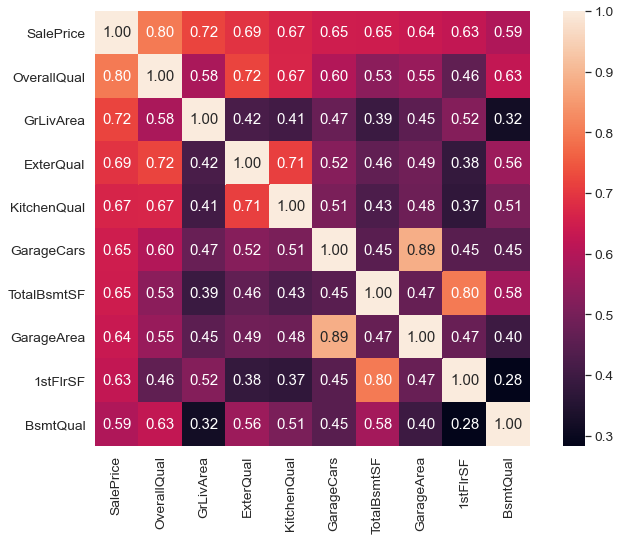

In [107]:
sns.set(rc = {'figure.figsize':(12,8)})
sns.set(font_scale=1.25)
sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
            yticklabels=larg_corrmat, xticklabels=larg_corrmat)

# Feature Scaling

類別變數進行 OneHotEncode；數值變數進行 Rescaling

In [108]:
cat_cols = train_data_no_outlier[cols].select_dtypes(include=["O"]).columns.values
num_cols = train_data_no_outlier[cols].select_dtypes(include=np.number).columns.values

In [109]:
print('Categorical features for one-hot-encoding:\n')
cat_cols

Categorical features for one-hot-encoding:



array(['MasVnrType', 'MSZoning', 'SaleCondition', 'RoofStyle',
       'GarageType', 'Electrical', 'SaleType', 'Exterior1st',
       'MSSubClass', 'Exterior2nd', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'BldgType', 'Foundation'], dtype=object)

In [110]:
print('Numerical features for rescaling:\n')
num_cols

Numerical features for rescaling:



array(['GrLivArea', 'FullBath', 'BsmtUnfSF', 'KitchenAbvGr', 'WoodDeckSF',
       'BedroomAbvGr', 'OverallCond', 'BsmtQual', 'OpenPorchSF',
       'EnclosedPorch', 'KitchenQual', 'BsmtFinSF1', 'Id', 'GarageArea',
       'TotRmsAbvGrd', 'HeatingQC', 'BsmtFinType1', 'HalfBath', 'YrSold',
       '1stFlrSF', 'OverallQual', 'GarageFinish', 'CentralAir',
       'TotalBsmtSF', 'GarageYrBlt', 'ExterQual', 'MasVnrArea',
       'BsmtFullBath', 'YearRemodAdd', 'MoSold', 'GarageCars',
       'PavedDrive', 'LotArea', '2ndFlrSF', 'LotShape', 'BsmtExposure',
       'YearBuilt', 'Fireplaces'], dtype=object)

https://niyanchun.com/sklearn-columntransformer-and-onehotencoder.html

In [111]:
cat_cols = train_data_no_outlier.select_dtypes(include=["O"]).columns.values
num_cols = train_data_no_outlier.select_dtypes(include=np.number).columns.values

In [112]:
num_cols

array(['Id', 'LotArea', 'Street', 'LotShape', 'LandSlope', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], dtype=object)

In [113]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder

preprocessor = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('num', MinMaxScaler(), num_cols)],
    verbose=True)

# 建模

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [164]:
x_train, x_val, y_train, y_val = train_test_split(train_data_no_outlier, log_train_sale_price, random_state=42, train_size=0.8)

In [177]:
knn = KNeighborsRegressor()

clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', knn)])

clf.fit(x_train, y_train)
print("train score:", clf.score(x_train, y_train))

print("val score:", clf.score(x_val, y_val))

[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing num, total=   0.0s
train score: 0.8245548357888618
val score: 0.7191490415923238


In [ ]:
# 複製模型
from sklearn.base import clone 

a = LinearRegression()
b = clone(a)

### 訓練多個模型

In [118]:
def rmse(model, X_train, X_val, y_train, y_val):
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_val = model.predict(X_val)
    RMSE_train = np.sqrt(mean_squared_error(y_train, pred_train))
    RMSE_val = np.sqrt(mean_squared_error(y_val, pred_val))
    return RMSE_train, RMSE_val

In [119]:
models = [LinearRegression(), KNeighborsRegressor(), SVR(), 
          DecisionTreeRegressor(), RandomForestRegressor(), 
          XGBRegressor(objective ='reg:squarederror')]

In [122]:
from sklearn.pipeline import Pipeline

def predict(model):
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', model)])
    RMSE_train, RMSE_val = rmse(clf, x_train, x_val, y_train, y_val)
    print("Training RMSE: %.3f" % RMSE_train)
    print("Validation RMSE: %.3f" % RMSE_val)
    
#     clf.fit(x_train, y_train)
#     print("model score: %.3f" % clf.score(x_val, y_val))

In [123]:
names = ['LR', 'KNN', 'SVR', 'DT', 'RF', 'XGB']
for name, model in zip(names, models):
    print(name, ":")
    predict(model)
    print("=======================================================")

LR :
[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing num, total=   0.0s
Training RMSE: 0.062
Validation RMSE: 151312201.931
KNN :
[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing num, total=   0.0s
Training RMSE: 0.166
Validation RMSE: 0.211
SVR :
[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing num, total=   0.0s
Training RMSE: 0.078
Validation RMSE: 0.124
DT :
[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing num, total=   0.0s
Training RMSE: 0.000
Validation RMSE: 0.010
RF :
[ColumnTransformer] ........... (1 of 2) Processing cat, total=   0.0s
[ColumnTransformer] ........... (2 of 2) Processing num, total=   0.0s
Training RMSE: 0.006
Validation RMSE: 0.012
XGB :
[ColumnTransformer] .........

### Stacking

In [124]:
from sklearn.ensemble import StackingRegressor

In [143]:
estimators = [
    ('knn', KNeighborsRegressor()),
    ('svr', SVR()),
    ('dt', DecisionTreeRegressor())
]

In [144]:
from sklearn.neural_network import MLPRegressor

In [171]:
reg = StackingRegressor(estimators=estimators, final_estimator=LinearRegression())

In [172]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', reg)])

In [179]:
print("train score:", clf.score(x_train, y_train))
print("val score:", clf.score(x_val, y_val))

train score: 0.8245548357888618
val score: 0.7191490415923238
